POINT：
<br>画一维热图:使用imshow函数,只不过要人为地将一维数据复制增宽为二维数据
<br>参数的选取非常重要,要使原方程收敛,$\alpha$与$\beta$要选取合适的值,经尝试若取$\alpha=1,\beta=-1$原方程发散,取$\alpha=0.4,\beta=0.2$时原方程收敛,猜测取$\alpha < 1,\beta < 1$时原方程都应该收敛,发散是的具体行为是只要Umat矩阵在某一列中出现负数,之后就会逐渐地发散开来,越算越大

PRO:
<br>用字典装参数可能会使程序更紧凑,清晰一些
<br>作热量分布的动态图像
<br>传热方程、波动方程最后都有相同的矩阵递推关系，如何把这两个方程融合在一起
<br>如何把传热方程、亥姆霍兹方程、薛定谔方程融合在一起
<br>偏微分方程大多需要用到条纹矩阵,可以创建一个生成条纹矩阵的函数

NEW:
<br>np.tile;np.repeat

In [23]:
import numpy as np
#初始化数据
a=5
xN,tN=10,1
x0,t0=0,0
deltax=0.1
alpha_target=0.4
deltat=alpha_target*(deltax/a)**2#这样alpha为0.5,beta=-1不会发生指数爆炸,a可取任意值
xlist=np.arange(x0,xN,deltax)
tlist=np.arange(t0,tN,deltat)
Nx,Nt=len(xlist),len(tlist)
#设置参数与定义函数
gamma=deltax**2/deltat
alpha=a**2/gamma
beta=1-2*alpha
Lamda=np.zeros((Nx-2,Nx-2))
def Boundary(t):
    '''边界条件函数'''
    f=0
    g=0
    return f,g
def Initial(x):
    '''初始条件函数'''
    fun=lambda x:x*(xN-x)/xN**2
    w=fun(x)
    return w
#创建条纹矩阵Lamda
for i in range(Nx-3):
    Lamda[i,i],Lamda[i,i+1],Lamda[i+1,i]=beta,alpha,alpha
Lamda[Nx-3,Nx-3]=beta
#设置Omega矩阵
Omegamat=np.zeros((Nx-2,Nt))
Omegamat[0,:],Omegamat[-1,:]=Boundary(tlist)
#计算主函数U矩阵
Umat=np.zeros((Nx-2,Nt))
Umat[:,0]=Initial(xlist[1:Nx-1])
for j in range(1,Nt):
    Umat[:,j]=Lamda@Umat[:,j-1]+alpha*Omegamat[:,j-1]
    index=Umat[:,j]<0
    if np.sum(Umat[index,j])<0:
        #检验Umat矩阵中是否存在负数,若存在就立即停止计算
        break

In [24]:
#计算理论值
from math import pi
K=50#取级数解析解的前50项
def analy_u(x,t):
    '''解析解表达式'''#需要用np.sin才能实现对矩阵运算
    sum=np.zeros((Nx-2,Nt))
    for k in range(K):
        sum=sum+8/(pi*(2*k+1))**3*np.e**(-((2*k+1)*pi*a/xN)**2*t)*np.sin((2*k+1)*pi*x/xN)
    return sum
T,X=np.meshgrid(tlist,xlist[1:Nx-1])
analy_Umat=analy_u(X,T)

解析解为$$u(x, t)=\sum_{k=0}^{\infty} \frac{8}{\pi^{3}(2 k+1)^{3}} \exp \left[-\frac{(2 k+1)^{2} \pi^{2} a^{2} t}{l^{2}}\right] \sin \frac{(2 k+1)}{l} \pi x$$

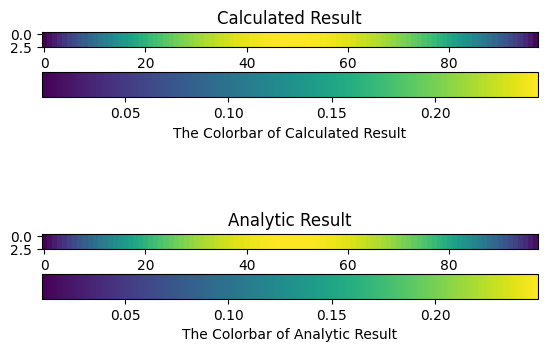

In [25]:
#二维作图
width=3
tj=5
calcu_result=Umat[:,tj]
analy_result=analy_Umat[:,tj]
calcu_result=np.tile(calcu_result,(width,1))
analy_result=np.tile(analy_result,(width,1))
import matplotlib.pyplot as plt
fig=plt.figure()
ax1=fig.add_subplot(2,1,1)
imshow_calcu=ax1.imshow(calcu_result)
fig.colorbar(imshow_calcu,orientation='horizontal',label='The Colorbar of Calculated Result')
ax1.set_title('Calculated Result')
ax2=fig.add_subplot(2,1,2)
imshow_analy=ax2.imshow(analy_result)
fig.colorbar(imshow_analy,orientation='horizontal',label='The Colorbar of Analytic Result')
ax2.set_title('Analytic Result')
plt.show()

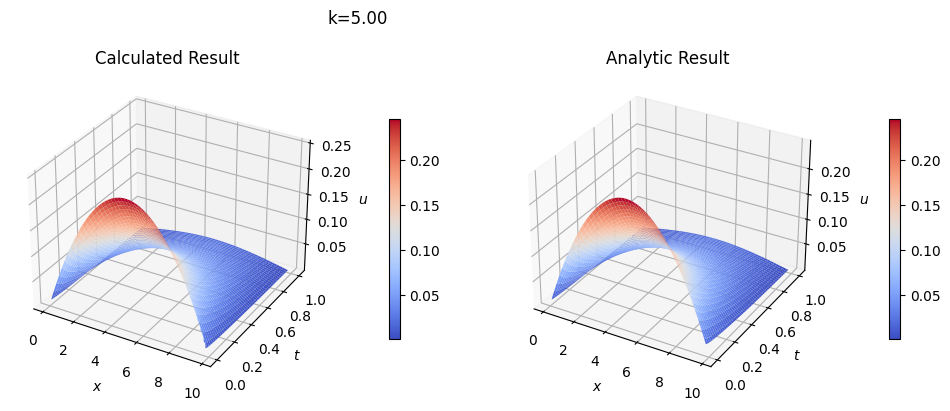

In [92]:
from matplotlib import cm
fig=plt.figure(figsize=(12,4))
fig.suptitle('k=%.2f'%(a))
ax1=fig.add_subplot(1,2,1,projection='3d')
fig.tight_layout()#子图见紧密排列
calcu_surf=ax1.plot_surface(X,T,Umat,cmap=cm.coolwarm)
fig.colorbar(calcu_surf,fraction=0.04,pad=0.1,shrink=0.7)
ax1.set_title('Calculated Result')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$t$')
ax1.set_zlabel('$u$')
ax2=fig.add_subplot(1,2,2,projection='3d')
analy_surf=ax2.plot_surface(X,T,analy_Umat,cmap=cm.coolwarm)
fig.colorbar(analy_surf,fraction=0.04,pad=0.1,shrink=0.7)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$t$')
ax2.set_zlabel('$u$')
ax2.set_title('Analytic Result')
plt.tight_layout()
plt.show()